NameError: name 'np' is not defined

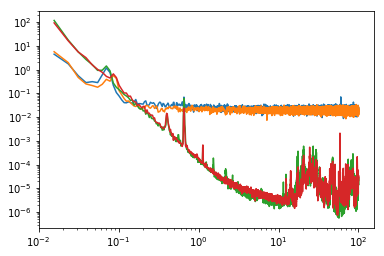

In [8]:
import dtt2hdf
import matplotlib.pyplot as plt
import numpy as np
items = dtt2hdf.read_diaggui('./data/SR2_IP_noise_20200720a.xml')
f = items.results.PSD['K1:VIS-SR2_IP_BLEND_ACCL_IN1'].FHz
lvdtl = items.results.PSD['K1:VIS-SR2_IP_BLEND_LVDTL_IN1'].PSD[0]
lvdtt = items.results.PSD['K1:VIS-SR2_IP_BLEND_LVDTT_IN1'].PSD[0]
accl = items.results.PSD['K1:VIS-SR2_IP_BLEND_ACCL_IN1'].PSD[0]
acct = items.results.PSD['K1:VIS-SR2_IP_BLEND_ACCT_IN1'].PSD[0]
mask = f>=1e-2
f = f[mask]
lvdtl = lvdtl[mask]
lvdtt = lvdtt[mask]
accl = accl[mask]
acct = acct[mask]
plt.loglog(f,lvdtl)
plt.loglog(f,lvdtt)
plt.loglog(f,accl)
plt.loglog(f,acct)
from kontrol.model import *
from kontrol import quad_sum

def low_noise_model(f, seis_N0, lvdt_N0, lvdt_fc):
    noise = quad_sum(seis_N0/f**2.5, lvdt_noise(f, lvdt_N0, lvdt_fc))
    return(noise)

# Make weight to ignore non-noise components between 0.03 and 0.2 Hz
low_noise_weight = np.ones_like(f)
for i in range(len(low_noise_weight)):
    if f[i]>0.03 and f[i]<0.2:
        low_noise_weight[i]=0
lvdtl_args = noise_fit(low_noise_model, f, lvdtl, weight = low_noise_weight)
lvdtt_args = noise_fit(low_noise_model, f, lvdtt, weight = low_noise_weight)
plt.loglog(f, low_noise_model(f, *lvdtl_args))
plt.loglog(f, low_noise_model(f, *lvdtt_args))
# plt.loglog(f, low_noise_model(f, 1e-6, 1e-6, 1))
# data=np.loadtxt('./data/SR2_IP_noise_20200720a.txt')
# f, accltxt = data[:,0], data[:,4]
# plt.loglog(f,accltxt)
# len(accltxt)
# data
# plt.semilogx(np.angle(items.results.TF['K1:VIS-SR2_IP_BLEND_ACCL_IN1'].CSD[2]))